##Ventilator Pressure
Author: Luciana Restrepo Cadavid

CC 1001017585

Maestría en metrología

06/09/2025


#Theorical background
Mechanical ventilation is a fundamental life-support intervention used in intensive care units to assist or replace spontaneous breathing in patients with respiratory failure. The effectiveness of ventilation depends on the accurate adjustment of pressure, flow, and volume, which are directly influenced by the mechanical properties of the lungs, such as compliance and resistance. Precise modeling and prediction of airway pressure are essential to optimize ventilator settings and prevent ventilator-induced lung injury (VILI) [1].

In this context, the Ventilator Pressure Prediction dataset was generated using a modified open-source ventilator connected to an artificial test lung via a respiratory circuit [2]. The setup included two control inputs: (i) the inspiratory valve opening percentage (continuous variable ranging from 0 to 100), which regulates the air inflow, and (ii) the expiratory valve status (binary variable, 0 = closed, 1 = open), which determines whether air can exit the lung. The output variable of interest is the airway pressure, recorded during approximately 3-second breath cycles.

This dataset provides a valuable resource for studying the relationship between ventilator control inputs and airway pressure, enabling the development of predictive models that can improve ventilator management strategies. By analyzing such simulated respiratory cycles under controlled lung settings, researchers can explore how compliance and resistance affect pressure dynamics, contributing to safer and more effective mechanical ventilation.

##References
[1] Amato, M. B. P., et al. "Driving pressure and survival in the acute respiratory distress syndrome." New England Journal of Medicine, 372.8 (2015): 747-755.


[2] Kaggle. Ventilator Pressure Prediction Competition. Available at: https://www.kaggle.com/c/ventilator-pressure-prediction
.


##Data characteristics

For this assignment, i selected the Ventilator Pressure Prediction dataset from Kaggle, which contains time series of simulated breaths generated with a modified open-source ventilator connected to a test lung. The dataset was chosen because it provides a controlled and well-structured environment to study the relationship between ventilator control inputs and airway pressure, which is highly relevant in the context of mechanical ventilation.

The dataset is provided in .csv format. Each row corresponds to a time step within a breath (up to 3 seconds long), and the main variables include:

**time_step:** timestamp of the measurement within the breath.

**u_in:** continuous control input (0–100) representing the percentage of the inspiratory valve opening.

**u_out:** binary control input (0 = valve closed, 1 = valve open) representing the expiratory valve state.

**pressure:** airway pressure in the respiratory circuit (target variable).

**breath_id:** unique identifier of each breath cycle.

**R, C:** resistance and compliance of the test lung, respectively.



##Library and dataset calling

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


train = pd.read_csv("/content/drive/MyDrive/Datasets lab1/train.csv")
test = pd.read_csv("/content/drive/MyDrive/Datasets lab1/test.csv")
sample = pd.read_csv("/content/drive/MyDrive/Datasets lab1/sample_submission.csv")

##Initial visualization

In [ ]:
print(train.head())
print(test.head())
print(sample.head())

   id  breath_id   R   C  time_step       u_in  u_out   pressure
0   1          1  20  50   0.000000   0.083334      0   5.837492
1   2          1  20  50   0.033652  18.383041      0   5.907794
2   3          1  20  50   0.067514  22.509278      0   7.876254
3   4          1  20  50   0.101542  22.808822      0  11.742872
4   5          1  20  50   0.135756  25.355850      0  12.234987
   id  breath_id  R   C  time_step       u_in  u_out
0   1          0  5  20   0.000000   0.000000      0
1   2          0  5  20   0.031904   7.515046      0
2   3          0  5  20   0.063827  14.651675      0
3   4          0  5  20   0.095751  21.230610      0
4   5          0  5  20   0.127644  26.320956      0
   id  pressure
0   1         0
1   2         0
2   3         0
3   4         0
4   5         0


In [ ]:
print("Train shape:", train.shape)
print("Test shape:", test.shape)
print("Sample shape:", sample.shape)

train.head()

Train shape: (6036000, 8)
Test shape: (4024000, 7)
Sample shape: (4024000, 2)


,id,breath_id,R,C,time_step,u_in,u_out,pressure
0,1,1,20,50,0.000000,0.083334,0,5.837492
1,2,1,20,50,0.033652,18.383041,0,5.907794
2,3,1,20,50,0.067514,22.509278,0,7.876254
3,4,1,20,50,0.101542,22.808822,0,11.742872
4,5,1,20,50,0.135756,25.355850,0,12.234987


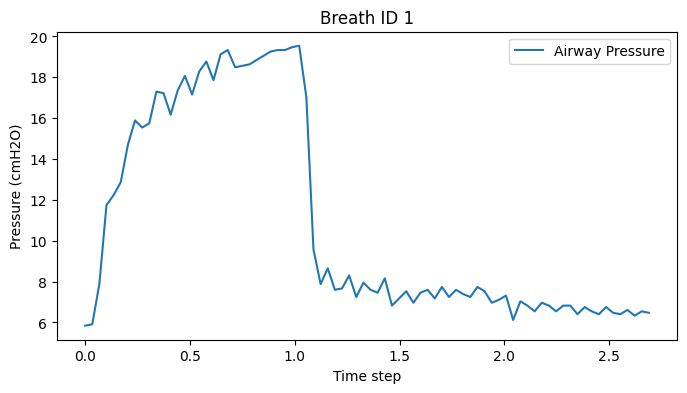

In [ ]:
#Select a breath cicle
breath_id = train["breath_id"].iloc[0]
cycle = train[train["breath_id"] == breath_id]

# Pressure vs time plot
plt.figure(figsize=(8,4))
plt.plot(cycle["time_step"], cycle["pressure"], label="Airway Pressure")
plt.xlabel("Time step")
plt.ylabel("Pressure (cmH2O)")
plt.title(f"Breath ID {breath_id}")
plt.legend()
plt.show()

In [ ]:
print(train.describe())

                 id     breath_id             R             C     time_step  \
count  6.036000e+06  6.036000e+06  6.036000e+06  6.036000e+06  6.036000e+06   
mean   3.018000e+06  6.283886e+04  2.703618e+01  2.608072e+01  1.307225e+00   
std    1.742443e+06  3.633526e+04  1.959549e+01  1.715231e+01  7.659778e-01   
min    1.000000e+00  1.000000e+00  5.000000e+00  1.000000e+01  0.000000e+00   
25%    1.509001e+06  3.137700e+04  5.000000e+00  1.000000e+01  6.428995e-01   
50%    3.018000e+06  6.276550e+04  2.000000e+01  2.000000e+01  1.308123e+00   
75%    4.527000e+06  9.430100e+04  5.000000e+01  5.000000e+01  1.965502e+00   
max    6.036000e+06  1.257490e+05  5.000000e+01  5.000000e+01  2.937238e+00   

               u_in         u_out      pressure  
count  6.036000e+06  6.036000e+06  6.036000e+06  
mean   7.321615e+00  6.204493e-01  1.122041e+01  
std    1.343470e+01  4.852752e-01  8.109703e+00  
min    0.000000e+00  0.000000e+00 -1.895744e+00  
25%    3.936623e-01  0.000000e+00  6.3

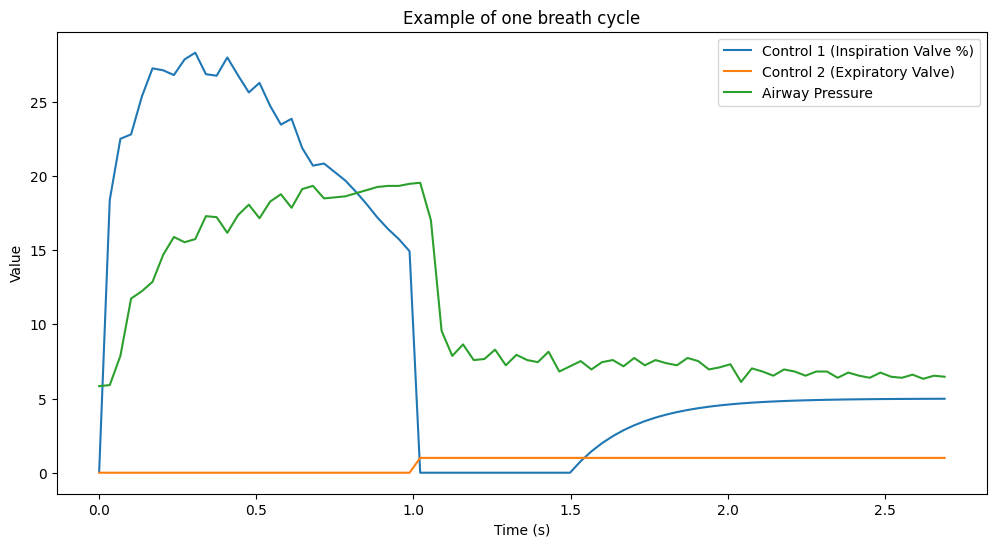

In [ ]:
example_breath = train[train['breath_id'] == train['breath_id'].iloc[0]]

plt.figure(figsize=(12,6))
plt.plot(example_breath['time_step'], example_breath['u_in'], label="Control 1 (Inspiration Valve %)")
plt.plot(example_breath['time_step'], example_breath['u_out'], label="Control 2 (Expiratory Valve)")
plt.plot(example_breath['time_step'], example_breath['pressure'], label="Airway Pressure")
plt.xlabel("Time (s)")
plt.ylabel("Value")
plt.title("Example of one breath cycle")
plt.legend()
plt.show()

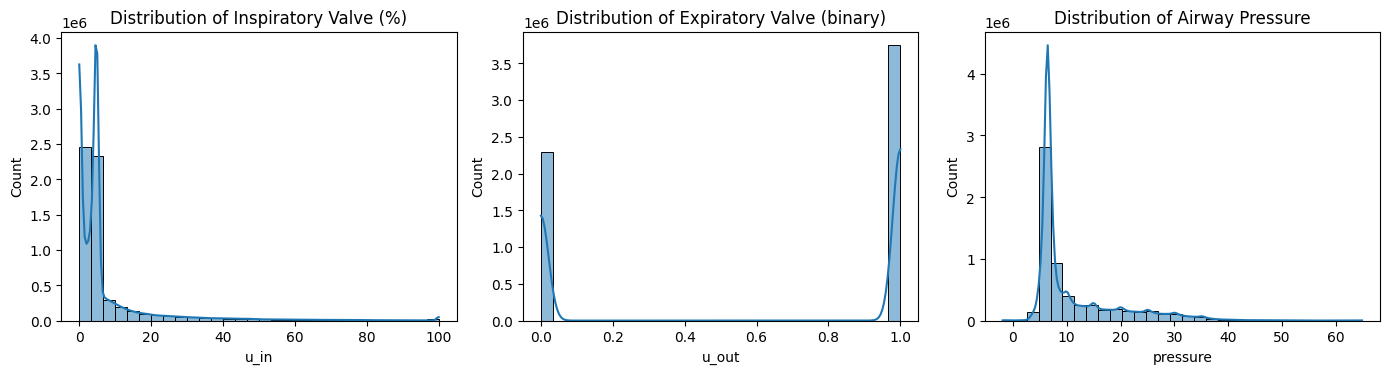

In [ ]:
plt.figure(figsize=(14,4))

plt.subplot(1,3,1)
sns.histplot(train['u_in'], bins=30, kde=True)
plt.title("Distribution of Inspiratory Valve (%)")

plt.subplot(1,3,2)
sns.histplot(train['u_out'], bins=30, kde=True)
plt.title("Distribution of Expiratory Valve (binary)")

plt.subplot(1,3,3)
sns.histplot(train['pressure'], bins=30, kde=True)
plt.title("Distribution of Airway Pressure")

plt.tight_layout()
plt.show()

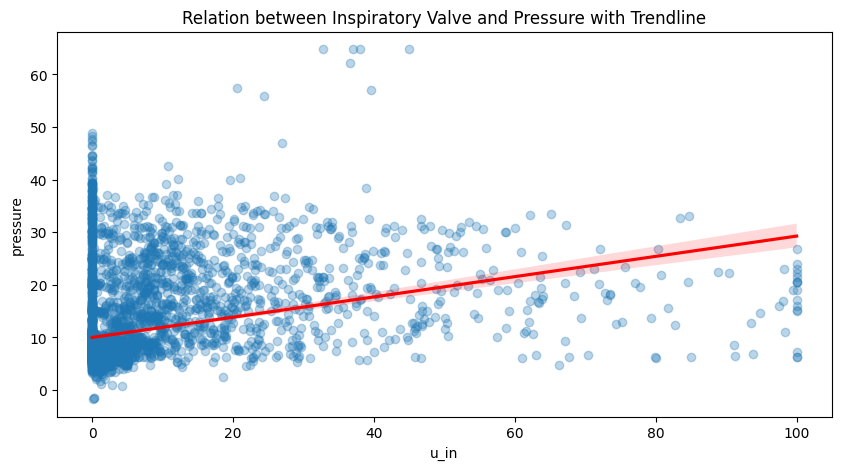

In [ ]:
plt.figure(figsize=(10,5))
sns.regplot(x='u_in', y='pressure', data=train.sample(5000),
            scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
plt.title("Relation between Inspiratory Valve and Pressure with Trendline")
plt.show()

## OOP for data processing

In [ ]:
class BreathProcessor:
    def __init__(self, train, breath_id):
        self.dataframe = train
        self.breath_id = breath_id
        self.breath_data = train[train['breath_id'] == breath_id]

    def summary_stats(self):
        """Return basic statistics of u_in, u_out and pressure for this breath"""
        return self.breath_data[['u_in', 'u_out', 'pressure']].describe()

    def plot_breath(self):
        """Plot the inspiratory/expiratory controls and pressure for this cycle"""
        plt.figure(figsize=(12,6))
        plt.plot(self.breath_data['time_step'], self.breath_data['u_in'], label="u_in (Inspiration Valve)")
        plt.plot(self.breath_data['time_step'], self.breath_data['u_out'], label="u_out (Expiratory Valve)")
        plt.plot(self.breath_data['time_step'], self.breath_data['pressure'], label="Airway Pressure")
        plt.xlabel("Time (s)")
        plt.ylabel("Value")
        plt.title(f"Breath cycle: {self.breath_id}")
        plt.legend()
        plt.show()

In [ ]:
class PressureAnalyzer:
    def __init__(self, train):
        self.train = train

    def correlation_with_uin(self):
        """Compute correlation between u_in and pressure"""
        return self.train['u_in'].corr(self.train['pressure'])

    def normalize_pressure(self):
        """Return a normalized version of the pressure signal"""
        p = self.train['pressure']
        return (p - p.min()) / (p.max() - p.min())

    def extract_features(self):
        """Extract simple features from pressure data"""
        return {
            'mean_pressure': self.train['pressure'].mean(),
            'max_pressure': self.train['pressure'].max(),
            'min_pressure': self.train['pressure'].min(),
            'std_pressure': self.train['pressure'].std()
        }

Summary stats for one breath:
            u_in      u_out   pressure
count  80.000000  80.000000  80.000000
mean   10.146007   0.625000  10.841247
std    10.123670   0.487177   5.135058
min     0.000000   0.000000   5.837492
25%     2.764350   0.000000   6.821722
50%     4.922568   1.000000   7.595045
75%    20.377155   1.000000  17.050684
max    28.313036   1.000000  19.546410


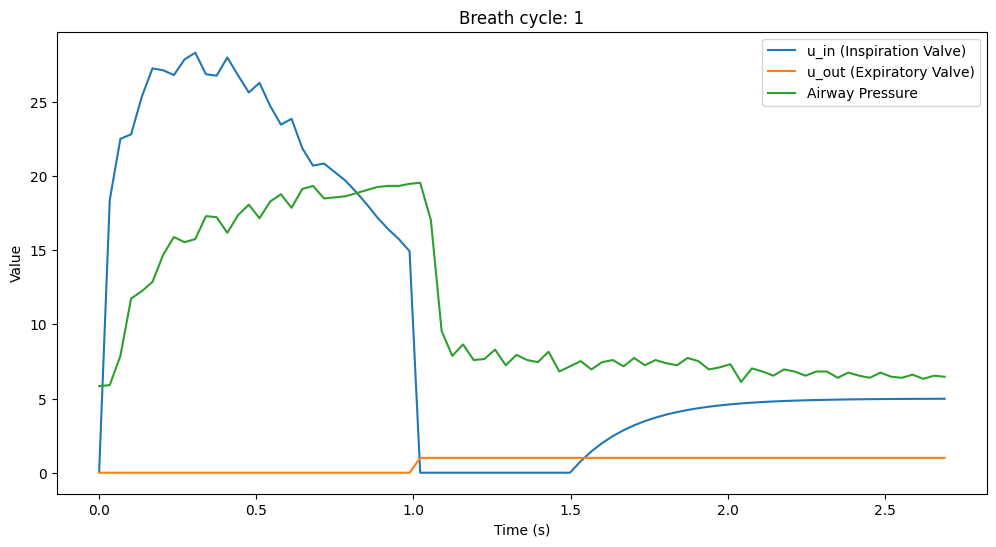


Correlation between u_in and pressure: 0.30041914166079936


In [ ]:
#Class examples
breath = BreathProcessor(train, train['breath_id'].iloc[5])
print("Summary stats for one breath:")
print(breath.summary_stats())
breath.plot_breath()

#Pressure analysis on the dataset (sample)
analyzer = PressureAnalyzer(train.sample(10000))  # smaller sample for eficiency
print("\nCorrelation between u_in and pressure:", analyzer.correlation_with_uin())

##Numerical derivation or integration of data

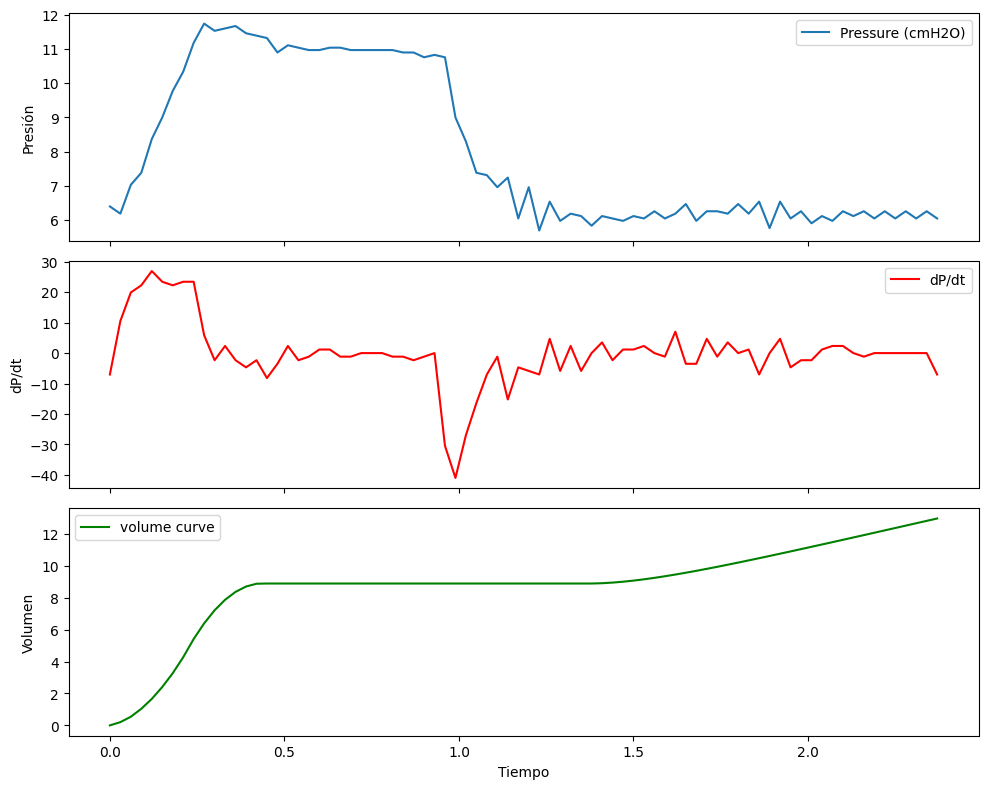

In [ ]:
#Let´s select some random breath
breath_id = 58
breath_data = train[train['breath_id'] == breath_id].copy()

#Create a timestap
dt = 0.03  # sampling rate (0.033 s or 30 ms)
t = np.arange(len(breath_data)) * dt

# Numerical derivative of airway pressure
breath_data['dP_dt'] = np.gradient(breath_data['pressure'], dt)

#Numerical integration of inspiratory flow
breath_data['volume'] = np.cumsum(breath_data['u_in'] * dt)

#Showing results
fig, axs = plt.subplots(3, 1, figsize=(10, 8), sharex=True)

# Pressure
axs[0].plot(t, breath_data['pressure'], label='Pressure (cmH2O)')
axs[0].set_ylabel('Presión')
axs[0].legend()

# dP/dt
axs[1].plot(t, breath_data['dP_dt'], color='r', label='dP/dt')
axs[1].set_ylabel('dP/dt')
axs[1].legend()

# Tidal volume curve
axs[2].plot(t, breath_data['volume'], color='g', label='volume curve')
axs[2].set_ylabel('Volumen')
axs[2].set_xlabel('Tiempo')
axs[2].legend()

plt.tight_layout()
plt.show()

##Analysis of Numerical Derivation and Integration

In this lab, numerical methods were applied to the mechanical ventilation dataset in order to extract clinically meaningful parameters. Two approaches were implemented: numerical differentiation of the airway pressure signal, and numerical integration of the inspiratory flow.

1. Numerical derivative of airway pressure:
The pressure signal describes how airway pressure changes during each respiratory cycle. By applying numerical differentiation, the rate of change of pressure with respect to time (dP/dt) was obtained. This parameter is clinically relevant because it reflects the dynamics of pressure delivery:
- High positive values of dP/dt indicate a rapid increase in pressure, typically during the inspiratory phase when the ventilator is insufflating air.

- Negative values of dP/dt indicate a rapid decrease in pressure, corresponding to the expiratory phase when pressure is released.

2. Numerical integration of inspiratory flow:
The inspiratory flow (u_in) represents the volume of air delivered per unit of time. By integrating this signal over time, the cumulative inspired volume was obtained. This directly corresponds to the tidal volume, one of the most important parameters in mechanical ventilation.

- A lower than expected tidal volume may indicate leakage or restricted lung compliance.

- Excessively high tidal volumes may increase the risk of lung trauma and ventilator-induced lung injury.

3. Results:

- The pressure curve showed the expected rise during inspiration and fall during expiration.

- The pressure derivative (dP/dt) highlighted the rapid changes in slope, emphasizing the inspiratory and expiratory dynamics.

- The cumulative volume curve demonstrated how volume increases during inspiration and decreases during expiration, reflecting the effective ventilation delivered to the patient.



##Matrix operations

In [ ]:
#Select a breath cycle from the dataset
breath_id = 1
breath_data = train[train['breath_id'] == breath_id][['u_in', 'u_out', 'pressure']].values

# Creating the matrix
X = np.array(breath_data)   # matrix N x 3
print("Shape of X:", X.shape)

#Transposed
X_T = X.T

#Scalar product
M = X_T @ X
print("Matrix product result (X^T X):\n", M)

Shape of X: (80, 3)
Matrix product result (X^T X):
 [[16331.9228949    148.08579672 11904.35089874]
 [  148.08579672    50.           381.29891427]
 [11904.35089874   381.29891427 11485.74754111]]


##Matrix Operations on Respiratory Data

In this section, matrix and tensor operations were applied to the ventilator dataset to analyze the relationships between inspiratory flow (u_in), expiratory flow (u_out), and airway pressure. Each respiratory cycle was represented as a matrix X of dimensions N × 3.

1. Matrix representation and transposition:
The respiratory signals were arranged into a data matrix X. Transposing the matrix (Xᵀ) reorganized the structure, placing the variables along the rows rather than columns, which facilitates certain linear algebra operations.

2. Matrix multiplication (XᵀX):
The product XᵀX was computed. This operation produces a symmetric matrix similar to a covariance matrix, which reveals how the variables are related:

- The diagonal elements represent the magnitude of each signal (flow in, flow out, and pressure).

- The off-diagonal elements represent the degree of covariance between variables, e.g., the correlation between inspiratory flow and airway pressure.

###Discussion of results


The analysis of the ventilator dataset provided valuable insights into respiratory mechanics and demonstrated the usefulness of numerical methods and matrix operations for biomedical signal analysis. First, descriptive statistics summarized the key characteristics of inspiratory flow, expiratory flow, and airway pressure, allowing for a general understanding of the datasets structure and variability. This initial step highlighted the differences in magnitude between inspiration and expiration, which is consistent with the physiological behavior of the respiratory cycle.

The implementation of numerical differentiation and integration further expanded the analysis. The derivative of airway pressure (dP/dt) captured the rate of change in pressure, providing information about the dynamics of airflow and airway resistance. Rapid increases in pressure suggested the ventilators inspiratory phase, while negative slopes corresponded to expiration. On the other hand, the integration of inspiratory flow yielded the cumulative volume, which approximates tidal volume. This parameter is clinically significant, as it reflects the amount of air delivered during each breath and is essential for assessing the safety and effectiveness of mechanical ventilation.

Matrix operations revealed deeper structural relationships between the variables. By representing the respiratory cycle as a matrix, the multiplication XᵀX highlighted the covariance between inspiratory flow and airway pressure, confirming their strong physiological correlation.

###Conclussions

- Descriptive statistics revealed the expected physiological differences between inspiratory and expiratory signals, confirming the datasets reliability.

- Numerical differentiation of airway pressure (dP/dt) provided insight into the rate of change of pressure through time, which is relevant for assessing airway resistance and ventilator dynamics.

- Integration of inspiratory flow successfully estimated cumulative volume, closely related to tidal volume, a key clinical parameter in ventilation.

- Matrix multiplication (XᵀX) highlighted strong correlations between inspiratory flow and pressure, reflecting the physiological relation between these variables.